In [1]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

In [11]:
# Load your dataset
df = pd.read_csv('G:/Tnxs/Kifiya3/Week0/project/Tnxs-kifiya3-week0-repo/data/togo-dapaong_qc.csv')

# Summary Statistics
summary_stats = df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [12]:
missing_values = df.isnull().sum()

# Check for negative values in GHI, DNI, DHI
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

# Outliers can be detected using IQR or Z-scores

In [13]:
print(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [14]:
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

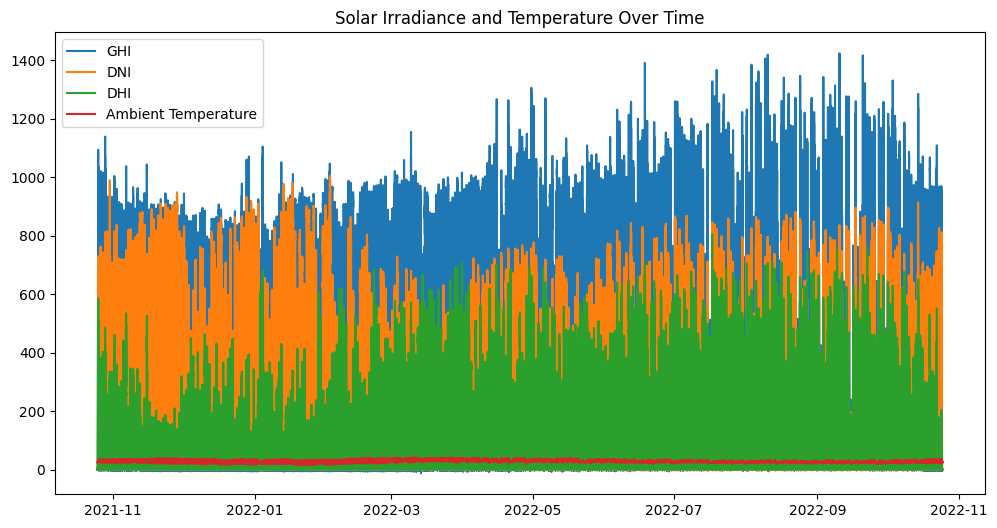

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['GHI'], label='GHI')
plt.plot(df['DNI'], label='DNI')
plt.plot(df['DHI'], label='DHI')
plt.plot(df['Tamb'], label='Ambient Temperature')
plt.legend()
plt.title('Solar Irradiance and Temperature Over Time')
plt.show()

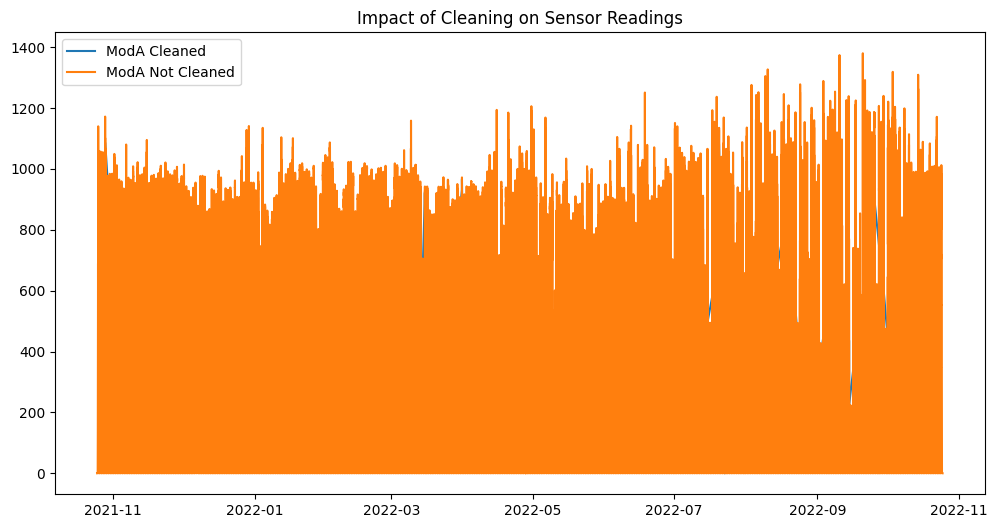

In [16]:
# Evaluate Cleaning Impact

cleaned_data = df[df['Cleaning'] == 1]
no_clean_data = df[df['Cleaning'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['ModA'], label='ModA Cleaned')
plt.plot(no_clean_data['ModA'], label='ModA Not Cleaned')
plt.legend()
plt.title('Impact of Cleaning on Sensor Readings')
plt.show()

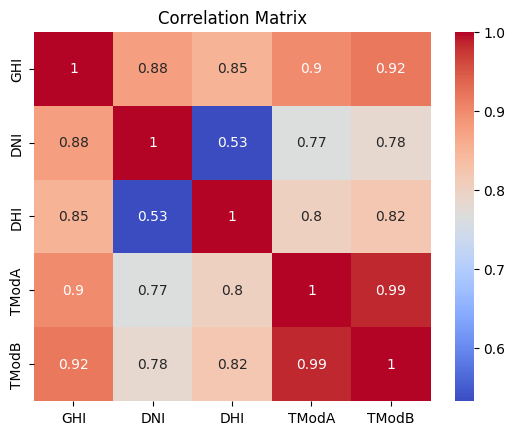

In [17]:
# Correlation Analysis

correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

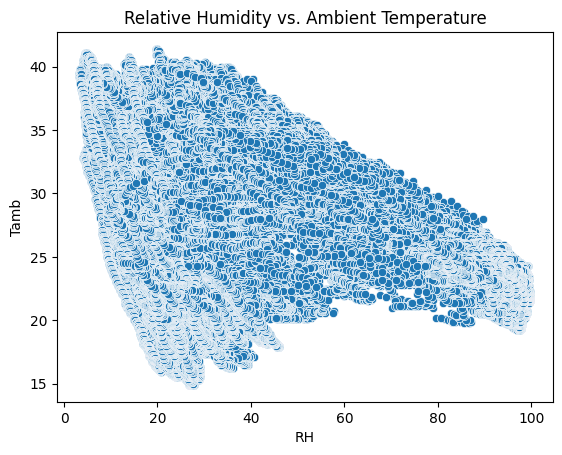

In [18]:
# Temperature Analysis
seaborn.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

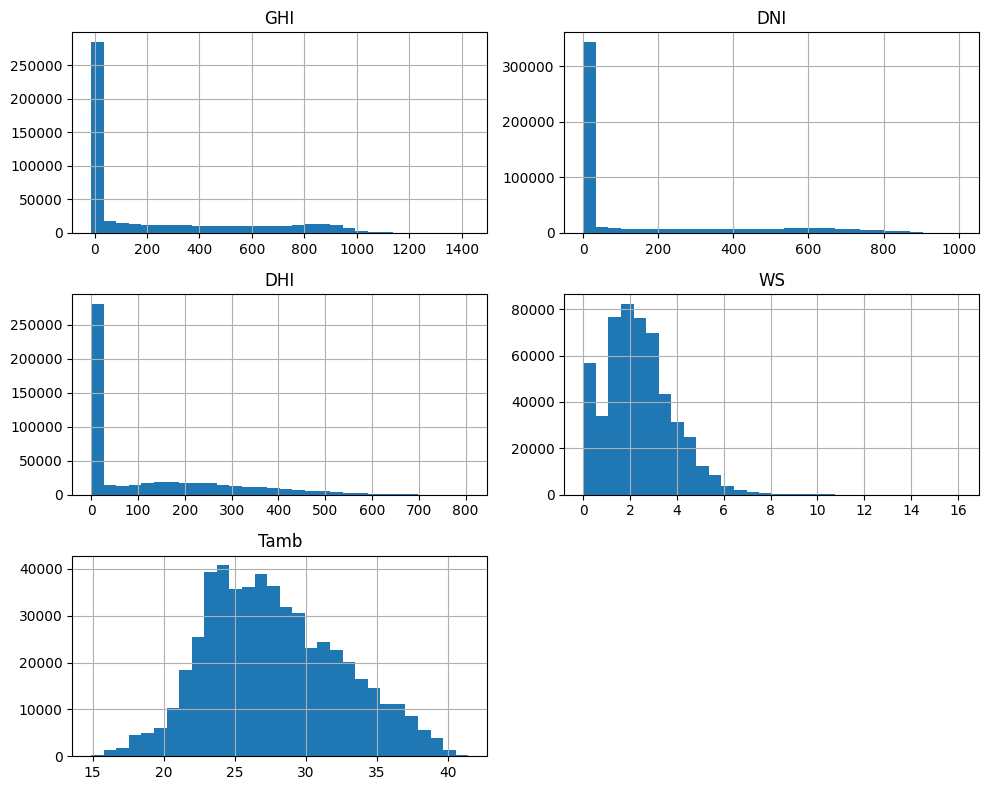

In [19]:
# Create Histograms
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [20]:
# Handle Anomalies and Missing Values
# Drop columns with all null values
df.drop(columns=['Comments'], inplace=True)

# Fill or drop missing values as appropriate
df.fillna(method='ffill', inplace=True)  # Example method

C:\Users\belet\AppData\Local\Temp\ipykernel_33348\862148136.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example method


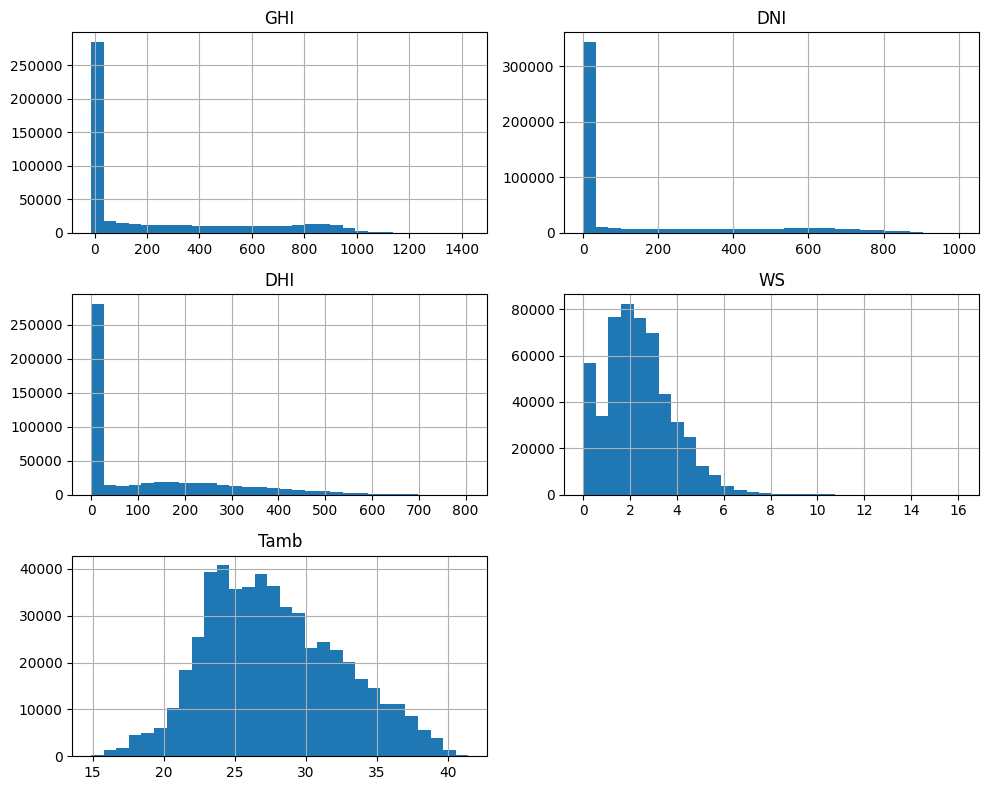

In [21]:
# Create Histograms
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()